## Feature extraction part 2!

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
import datetime as dt


sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
mbti = pd.read_pickle('mbti_ver1.pickle')

In [5]:
mbti.shape

(8675, 29)

In [6]:
#Get median for number of characters/words per post in each row

mbti['med_char'] = mbti['words_only'].apply(lambda x: np.median([len(i) for i in x]))
mbti['med_word'] = mbti['words_only'].apply(lambda x: np.median([len(i.split()) for i in x]))
mbti.shape
mbti.head()

type                                         words_only  \
0  INFJ  [, , enfp and intj moments sportscenter not to...   
1  ENTP  [I'm finding the lack of me in these posts ver...   
2  INTP  [Good one _____, Of course, to which I say I k...   
3  INTJ  [Dear INTP, I enjoyed our conversation the oth...   
4  ENTJ  [You're fired., That's another silly misconcep...   

                                               image  \
0  [http://41.media.tumblr.com/tumblr_lfouy03PMA1...   
1  [http://img188.imageshack.us/img188/6422/6020d...   
2                                                 []   
3                                                 []   
4  [https://encrypted-tbn2.gstatic.com/images?q=t...   

                                          video_link  \
0  [http://www.youtube.com/watch?v=qsXHcwe3krw, h...   
1       [http://www.youtube.com/watch?v=j5W73HaVQBg]   
2  [https://www.youtube.com/watch?v=fHiGbolFFGw, ...   
3  [https://www.youtube.com/watch?v=uelHwf8o7_U, ...   
4  [https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...   

                                           otherlink  n_video  n_links  \
0                                                 []       17       24   
1                                                 []        1       10   
2  [https://www.tumblr.com/blog/-alexxxandra-, ht...        3        5   
3                                                 []        2        2   
4                                                 []        3        6   

   n_image  n_otherlink                                        video_title  \
0        7            0  [FLYING IN MY PJs - [Living In Alaska 256], EN...   
1        9            0  [Jermaine Dupri - Welcome To Atlanta ft. Ludac...   
2        0            2  [Radiohead - Paranoid Android, ÐÐºÐµÐ°Ð½ ÐÐ»...   
3        0            0  [Eminem - Love The Way You Lie ft. Rihanna, Ro...   
4        3            0  [Yung Gud - Hello (Ft. Yemi), Verbatim: What I...   

   ... n_char  n_word  mbti_ref_most n_action  n_caps n_caps_char  \
0  ...   3242     581           ENFP        0       0           0   
1  ...   6281    1210           ENTP        2       5          18   
2  ...   4882     880           INTJ        0       1           4   
3  ...   5997    1111           ESFJ        0       6          19   
4  ...   5560    1010           ENTJ        0       6          37   

   word_cap_ratio char_cap_ratio  med_char  med_word  
0        0.000000       0.000000      49.5       9.5  
1        0.004132       0.002866     137.0      29.0  
2        0.001136       0.000819      85.5      15.0  
3        0.005401       0.003168     109.0      21.5  
4        0.005941       0.006655      92.0      18.5  

[5 rows x 31 columns]

In [7]:
#Spice things up a little by splitting to individual types
mbti['is_E'] = mbti['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
mbti['is_S'] = mbti['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
mbti['is_T'] = mbti['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
mbti['is_J'] = mbti['type'].apply(lambda x: 1 if x[3] == 'J' else 0)

#Yes this is the direction I am gonna go.

In [8]:
mbti['word_char_ratio'] = mbti['med_char'] / mbti['med_word']

In [9]:
mbti.columns

Index(['type', 'words_only', 'image', 'video_link', 'otherlink', 'n_video',
       'n_links', 'n_image', 'n_otherlink', 'video_title', 'emoticons',
       'emoticon_count', 'mention_count', 'hashtag', 'hashtag_count',
       'mbti_ref', 'mbti_ref_count', 'ennea', 'ennea_count', 'bracket_count',
       'dots_count', 'n_char', 'n_word', 'mbti_ref_most', 'n_action', 'n_caps',
       'n_caps_char', 'word_cap_ratio', 'char_cap_ratio', 'med_char',
       'med_word', 'is_E', 'is_S', 'is_T', 'is_J', 'word_char_ratio'],
      dtype='object')

In [10]:
#Look at number by descending count per type
mbti[['type','emoticon_count']].sort_values('emoticon_count', ascending=False).head(10)
#But then again this can be skewed towards higher participation, so...

type  emoticon_count
5746  INFP              47
3264  ENFJ              45
645   INTJ              36
4347  ENFP              36
5795  INFP              36
1365  ENFP              36
4183  ENFP              35
2725  ENFP              34
5700  INTJ              34
1603  INFJ              33

In [11]:
#We look at averages below
#By eyeballing we can see that feelers tend to use more emoticons on average than thinkers with the exception of ISTJ
#The rest are more uhh uniform
mbti.groupby('type')['emoticon_count'].apply(np.mean).sort_values(ascending=False)

type
ESFP    3.229167
ENFP    2.997037
ISTJ    2.921951
ENFJ    2.400000
ISFP    2.383764
INFP    2.337336
ESTP    2.325843
INFJ    2.291156
ISFJ    2.120482
ENTP    2.071533
INTJ    2.044913
ESFJ    1.809524
ISTP    1.605341
ENTJ    1.597403
INTP    1.437883
ESTJ    1.384615
Name: emoticon_count, dtype: float64

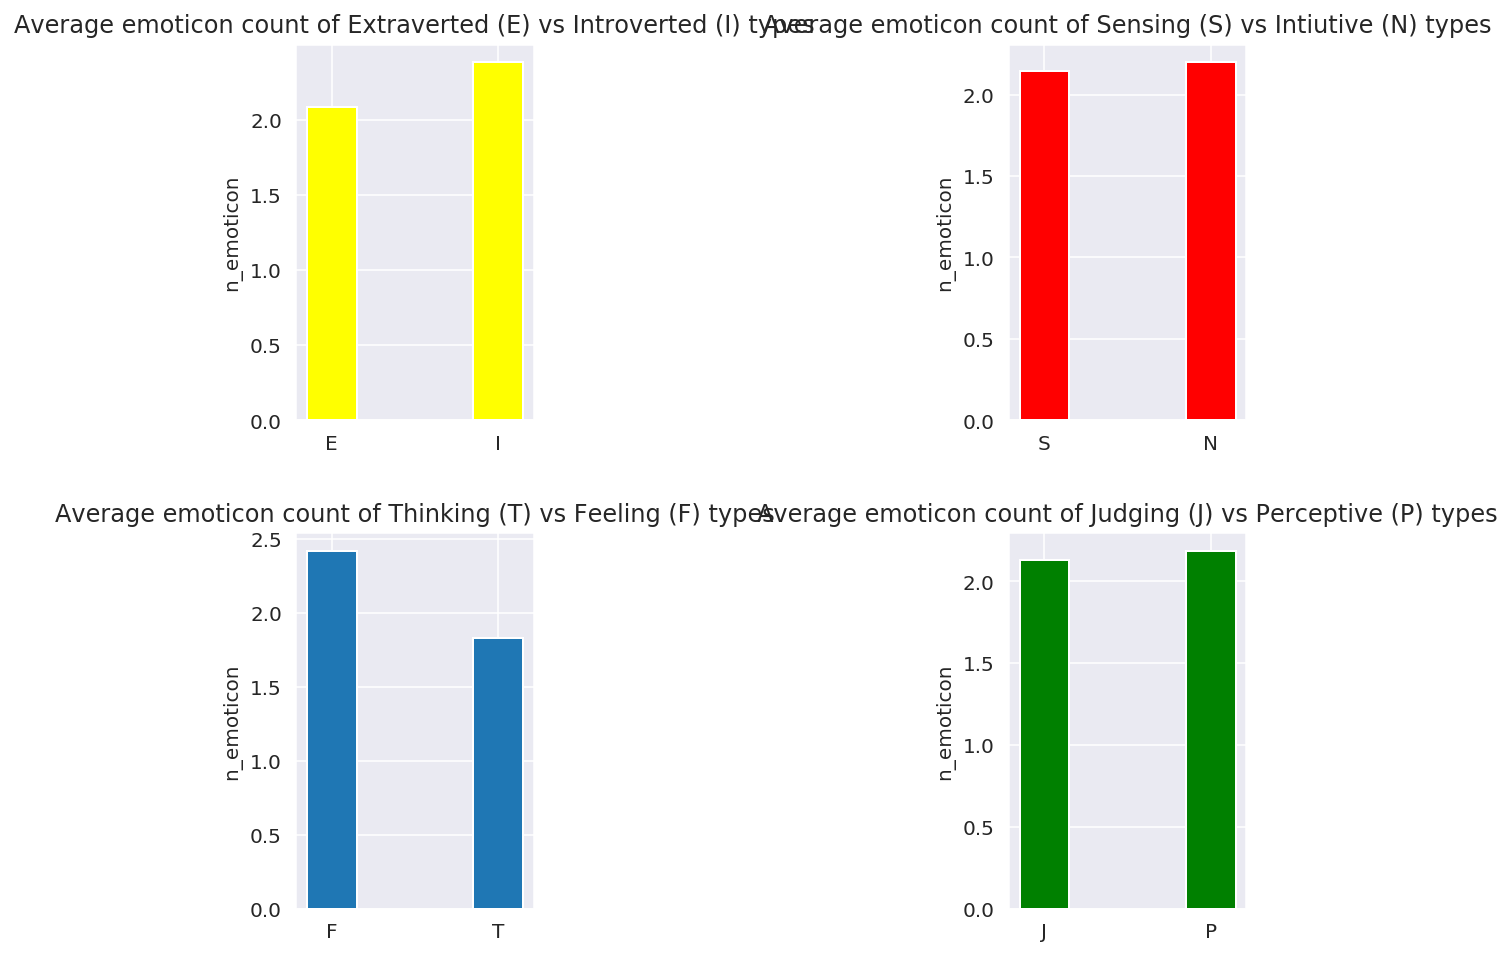

In [12]:
#If we look at 'is_T' instead (1 = T, 0 = F)
plt.figure(figsize=(6,6))
plt.subplot(221)
E = mbti.groupby('is_E')['emoticon_count'].apply(np.mean).sort_values(ascending=False)
plt.bar(E.index, E, width=0.3, tick_label=['I','E'], color='yellow')
plt.ylabel("n_emoticon")
plt.title("Average emoticon count of Extraverted (E) vs Introverted (I) types")

plt.subplot(222)
S = mbti.groupby('is_S')['emoticon_count'].apply(np.mean).sort_values(ascending=False)
plt.bar(S.index, S, width=0.3, tick_label=['N','S'], color='red')
plt.ylabel("n_emoticon")
plt.title("Average emoticon count of Sensing (S) vs Intiutive (N) types")

plt.subplot(223)
T = mbti.groupby('is_T')['emoticon_count'].apply(np.mean).sort_values(ascending=False)
plt.bar(T.index, T, width=0.3, tick_label=['F','T'])
plt.ylabel("n_emoticon")
plt.title("Average emoticon count of Thinking (T) vs Feeling (F) types")

plt.subplot(224)
J = mbti.groupby('is_J')['emoticon_count'].apply(np.mean).sort_values(ascending=False)
plt.bar(J.index, J, width=0.3, tick_label=['P','J'], color='green')
plt.ylabel("n_emoticon")
plt.title("Average emoticon count of Judging (J) vs Perceptive (P) types")

plt.subplots_adjust(left=0, bottom=1, right=1.1, top=2, wspace=2, hspace=0.3)

In [13]:
def compareplot(what):
    plt.figure(figsize=(6,6))
    plt.subplot(221)
    E = mbti.groupby('is_E')[what].apply(np.mean).sort_values(ascending=False)
    plt.bar(E.index, E, width=0.3, tick_label=['I','E'], color='yellow')
    plt.ylabel(what)
    plt.title("Average "+what+" of Extraverted (E) vs Introverted (I) types")

    plt.subplot(222)
    S = mbti.groupby('is_S')[what].apply(np.mean).sort_values(ascending=False)
    plt.bar(S.index, S, width=0.3, tick_label=['N','S'], color='red')
    plt.ylabel(what)
    plt.title("Average "+what+" of Sensing (S) vs Intiutive (N) types")

    plt.subplot(223)
    T = mbti.groupby('is_T')[what].apply(np.mean).sort_values(ascending=False)
    plt.bar(T.index, T, width=0.3, tick_label=['F','T'])
    plt.ylabel(what)
    plt.title("Average "+what+" of Thinking (T) vs Feeling (F) types")

    plt.subplot(224)
    J = mbti.groupby('is_J')[what].apply(np.mean).sort_values(ascending=False)
    plt.bar(J.index, J, width=0.3, tick_label=['P','J'], color='green')
    plt.ylabel(what)
    plt.title("Average "+what+" of Judging (J) vs Perceptive (P) types")

    plt.subplots_adjust(left=0, bottom=1, right=1.1, top=2, wspace=2, hspace=0.3)

In [14]:
mbti.columns

Index(['type', 'words_only', 'image', 'video_link', 'otherlink', 'n_video',
       'n_links', 'n_image', 'n_otherlink', 'video_title', 'emoticons',
       'emoticon_count', 'mention_count', 'hashtag', 'hashtag_count',
       'mbti_ref', 'mbti_ref_count', 'ennea', 'ennea_count', 'bracket_count',
       'dots_count', 'n_char', 'n_word', 'mbti_ref_most', 'n_action', 'n_caps',
       'n_caps_char', 'word_cap_ratio', 'char_cap_ratio', 'med_char',
       'med_word', 'is_E', 'is_S', 'is_T', 'is_J', 'word_char_ratio'],
      dtype='object')

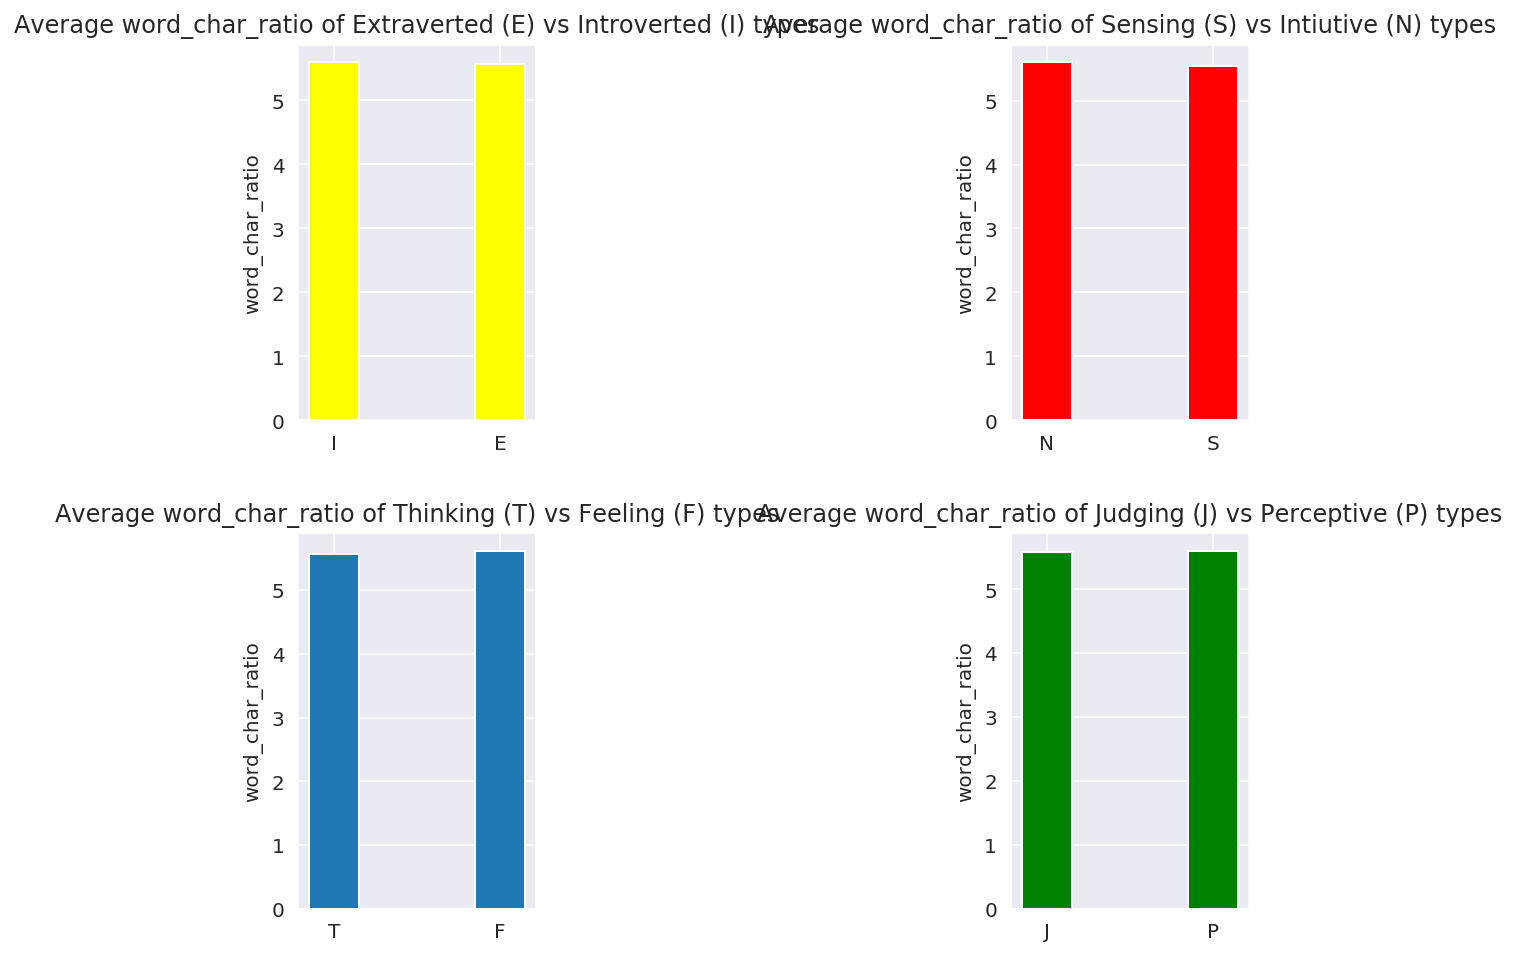

In [15]:
compareplot('word_char_ratio')

In [16]:
colli = ['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
       'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
       'word_cap_ratio','char_cap_ratio','med_char','med_word','is_E','is_S','is_T','is_J']
mbti_num = mbti[colli]
mbti_num.head()

n_video  n_links  n_image  emoticon_count  mention_count  hashtag_count  \
0       17       24        7               3              0              0   
1        1       10        9               0              0              0   
2        3        5        0               0              0              0   
3        2        2        0               0              0              0   
4        3        6        3               1              2              0   

   mbti_ref_count  ennea_count  bracket_count  dots_count  ...  n_caps  \
0               7            0              0          14  ...       0   
1              11            1              0          19  ...       5   
2               4            0              0          13  ...       1   
3              12            0              1          26  ...       6   
4               4            0              0          21  ...       6   

   n_caps_char  word_cap_ratio  char_cap_ratio  med_char  med_word  is_E  \
0            0        0.000000        0.000000      49.5       9.5     0   
1           18        0.004132        0.002866     137.0      29.0     1   
2            4        0.001136        0.000819      85.5      15.0     0   
3           19        0.005401        0.003168     109.0      21.5     0   
4           37        0.005941        0.006655      92.0      18.5     1   

   is_S  is_T  is_J  
0     0     0     1  
1     0     1     0  
2     0     1     0  
3     0     1     1  
4     0     1     1  

[5 rows x 23 columns]

In [17]:
from statsmodels.formula.api import logit
logs = logit(formula='is_E ~ '+' + '.join(mbti_num.drop(['is_E','is_S','is_T','is_J'], axis=1).columns), data=mbti_num).fit()
logs.summary()

Optimization terminated successfully.
         Current function value: 0.513612
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   is_E   No. Observations:                 8675
Model:                          Logit   Df Residuals:                     8655
Method:                           MLE   Df Model:                           19
Date:                Sun, 13 Oct 2019   Pseudo R-squ.:                 0.04851
Time:                        18:15:27   Log-Likelihood:                -4455.6
converged:                       True   LL-Null:                       -4682.7
Covariance Type:            nonrobust   LLR p-value:                 2.061e-84
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9405      0.171     -5.514      0.000      -1.275      -0.606
n_video           -0.0967      0.046     -2.085      0.037      -0.188      -0.006
n_links            0.0385      0.045      0.854      0.393      -0.050       0.127
n_image           -0.0447      0.047     -0.948      0.343      -0.137       0.048
emoticon_count     0.0145      0.006      2.295      0.022       0.002       0.027
mention_count      0.0876      0.029      2.984      0.003       0.030       0.145
hashtag_count      0.0043      0.073      0.059      0.953      -0.139       0.147
mbti_ref_count     0.0449      0.004     11.389      0.000       0.037       0.053
ennea_count        0.0967      0.019      5.027      0.000       0.059       0.134
bracket_count      0.0506      0.041      1.235      0.217      -0.030       0.131
dots_count         0.0041      0.007      0.619      0.536      -0.009       0.017
n_char            -0.0008      0.000     -4.551      0.000      -0.001      -0.000
n_word             0.0032      0.001      3.617      0.000       0.001       0.005
n_action           0.0724      0.020      3.622      0.000       0.033       0.112
n_caps             0.1586      0.049      3.241      0.001       0.063       0.255
n_caps_char       -0.0119      0.011     -1.114      0.265      -0.033       0.009
word_cap_ratio  -175.0221     51.771     -3.381      0.001    -276.491     -73.553
char_cap_ratio   155.4656     62.537      2.486      0.013      32.895     278.036
med_char           0.0026      0.004      0.666      0.505      -0.005       0.010
med_word          -0.0130      0.024     -0.545      0.585      -0.060       0.034
==================================================================================
"""

In [18]:
formu = 'is_E ~ n_video + emoticon_count + mention_count + mbti_ref_count + ennea_count + n_char + n_word + n_action + n_caps + word_cap_ratio + char_cap_ratio - 1'
logs = logit(formula=formu, data=mbti_num).fit()
logs.summary()

Optimization terminated successfully.
         Current function value: 0.516526
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   is_E   No. Observations:                 8675
Model:                          Logit   Df Residuals:                     8664
Method:                           MLE   Df Model:                           10
Date:                Sun, 13 Oct 2019   Pseudo R-squ.:                 0.04311
Time:                        18:15:34   Log-Likelihood:                -4480.9
converged:                       True   LL-Null:                       -4682.7
Covariance Type:            nonrobust   LLR p-value:                 1.481e-80
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
n_video           -0.0778      0.009     -8.854      0.000      -0.095      -0.061
emoticon_count     0.0082      0.006      1.303      0.193      -0.004       0.021
mention_count      0.0975      0.029      3.322      0.001       0.040       0.155
mbti_ref_count     0.0434      0.004     11.052      0.000       0.036       0.051
ennea_count        0.0876      0.019      4.546      0.000       0.050       0.125
n_char            -0.0007      0.000     -6.002      0.000      -0.001      -0.000
n_word             0.0025      0.001      3.776      0.000       0.001       0.004
n_action           0.0606      0.020      3.059      0.002       0.022       0.099
n_caps             0.1761      0.019      9.210      0.000       0.139       0.214
word_cap_ratio  -203.0728     26.755     -7.590      0.000    -255.511    -150.634
char_cap_ratio    87.4588     21.147      4.136      0.000      46.011     128.907
==================================================================================
"""

In [19]:
' + '.join(mbti_num.drop(['is_E','is_S','is_T','is_J'], axis=1).columns)

'n_video + n_links + n_image + emoticon_count + mention_count + hashtag_count + mbti_ref_count + ennea_count + bracket_count + dots_count + n_char + n_word + n_action + n_caps + n_caps_char + word_cap_ratio + char_cap_ratio + med_char + med_word'

/home/jason/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/jason/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


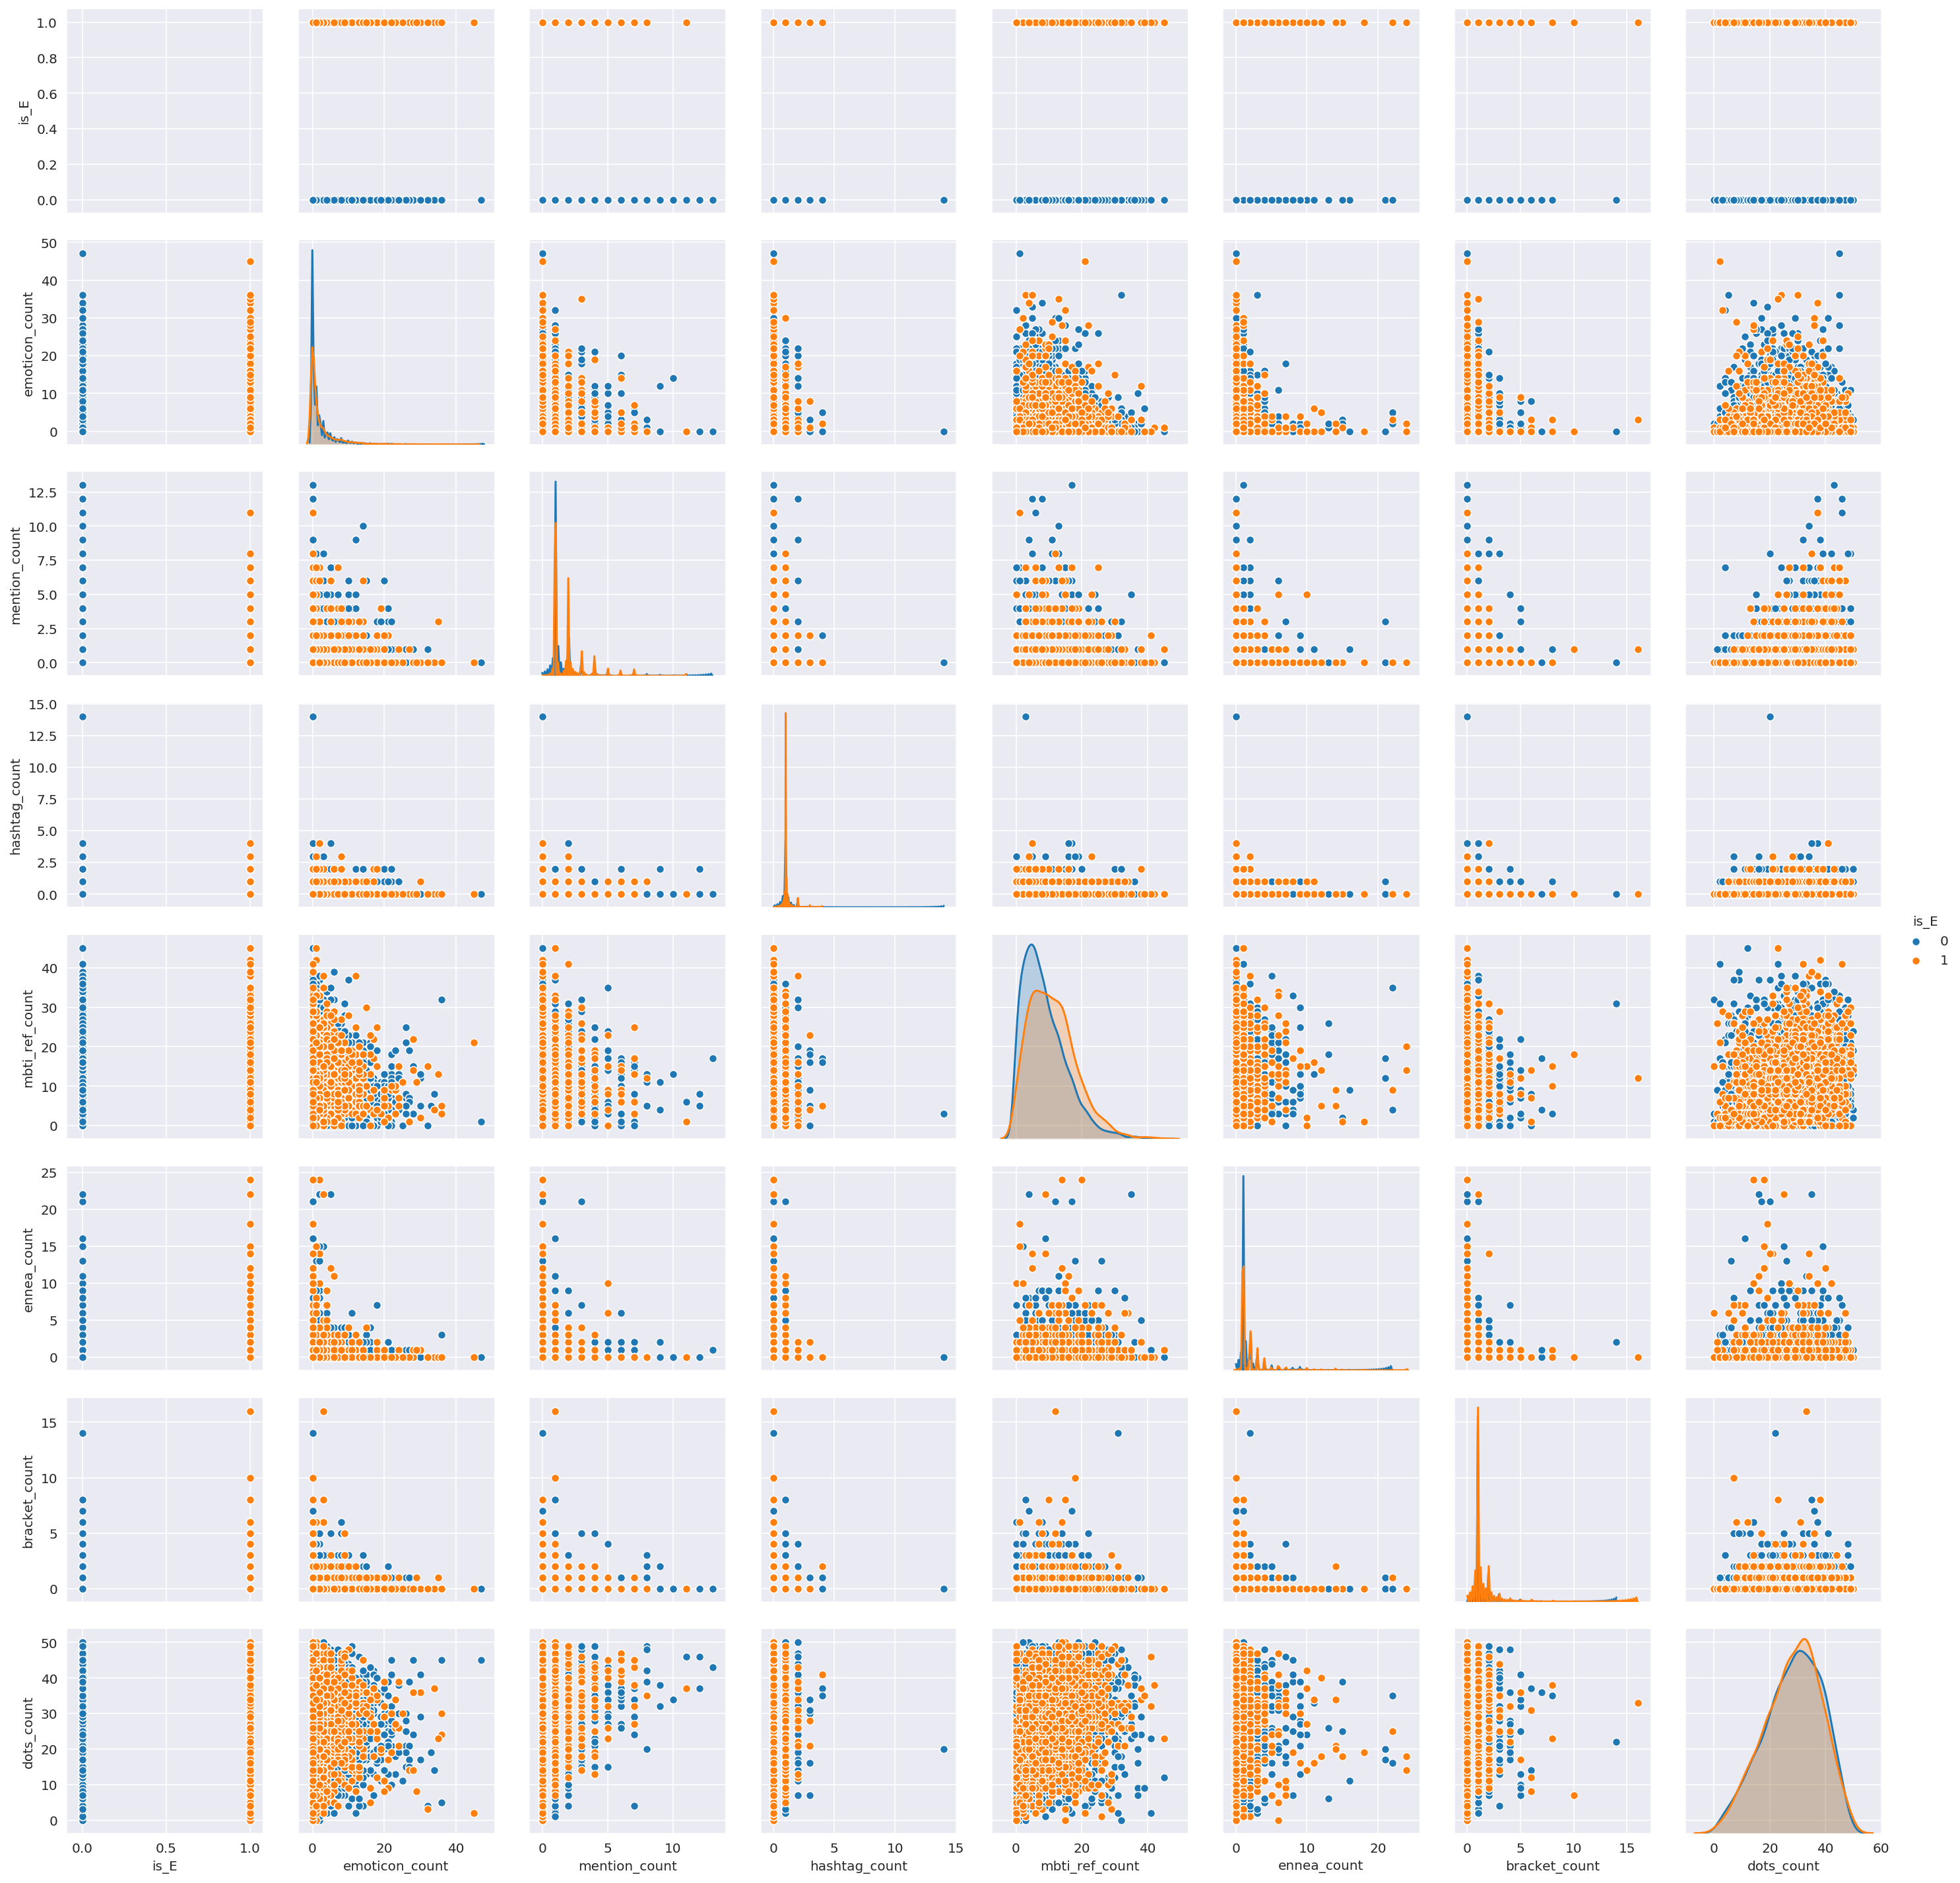

In [20]:
sns.pairplot(mbti_num[['is_E','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
       'ennea_count', 'bracket_count', 'dots_count']], hue='is_E')

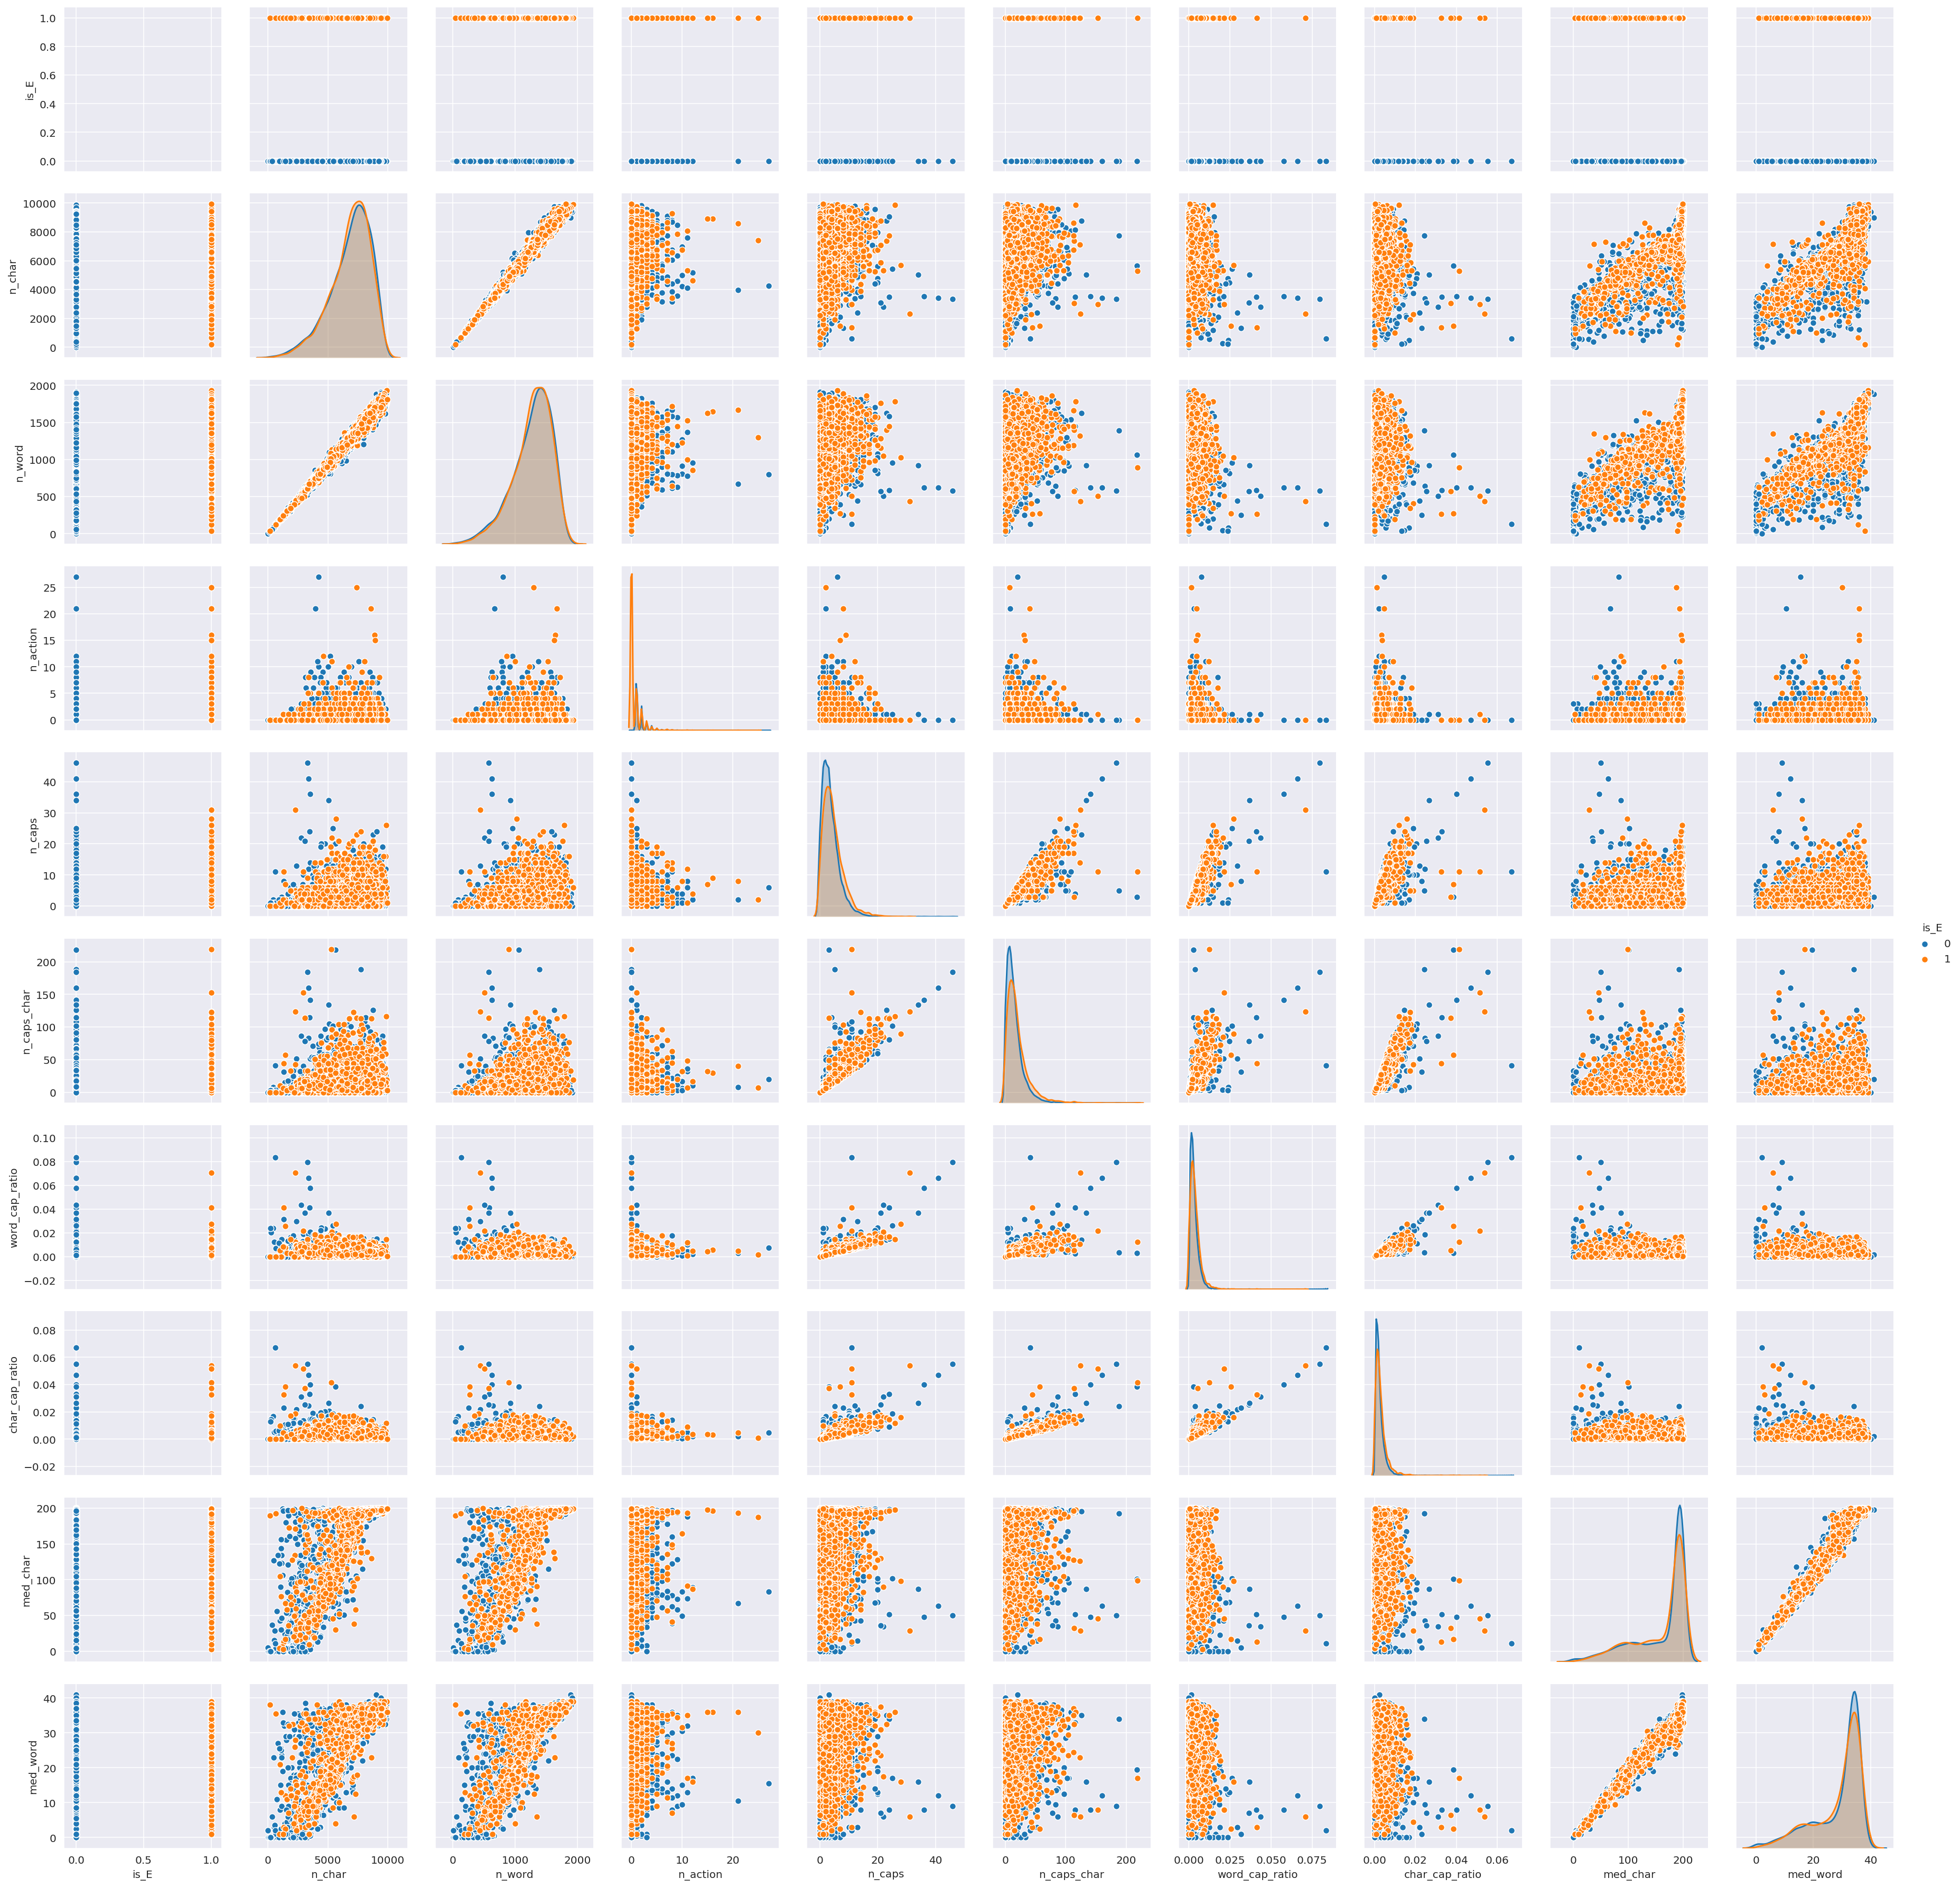

In [21]:
sns.pairplot(mbti_num[['is_E','n_char', 'n_word','n_action', 'n_caps','n_caps_char',
       'word_cap_ratio','char_cap_ratio','med_char','med_word']], hue='is_E')

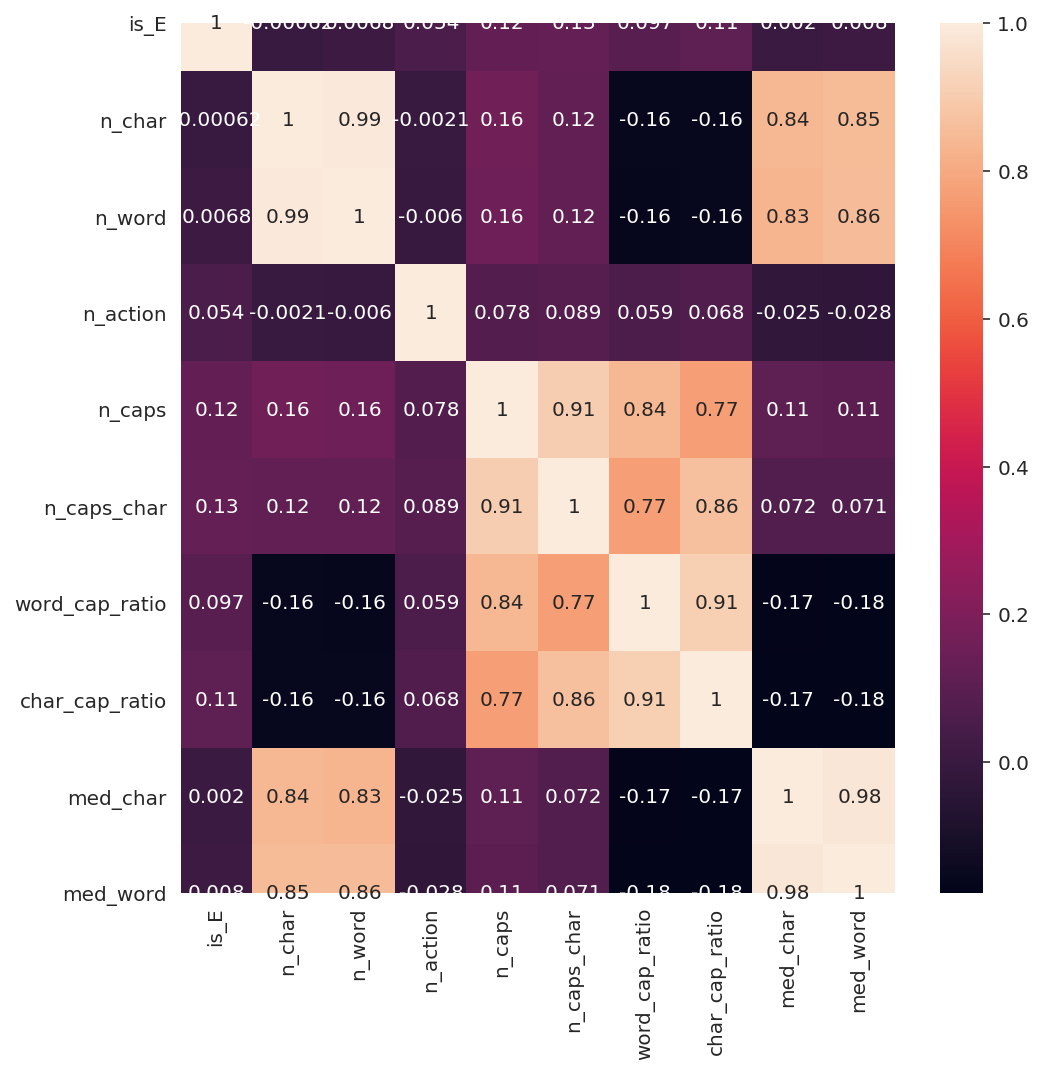

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(mbti_num[['is_E','n_char', 'n_word','n_action', 'n_caps','n_caps_char',
       'word_cap_ratio','char_cap_ratio','med_char','med_word']].corr(), annot=True)

In [23]:
y = mbti_num['is_E']
X = mbti_num[['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
       'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
       'word_cap_ratio','char_cap_ratio','med_char','med_word']]

I would like to first try out TPOT here

See how the performance will be like

In [26]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

y = mbti_num['is_E']
X = mbti_num[['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
       'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
       'word_cap_ratio','char_cap_ratio','med_char','med_word']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, scoring='roc_auc')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_E_try.py')

Generation 1 - Current best internal CV score: 0.6503977015399389
Generation 2 - Current best internal CV score: 0.6503977015399389
Generation 3 - Current best internal CV score: 0.6503977015399389
Generation 4 - Current best internal CV score: 0.6503977015399389
Generation 5 - Current best internal CV score: 0.6503977015399389

Best pipeline: LinearSVC(input_matrix, C=10.0, dual=False, loss=squared_hinge, penalty=l1, tol=0.01)
0.6566516853932585


In [39]:
# y = mbti_num['is_S']
# X = mbti_num[['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
#        'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
#        'word_cap_ratio','char_cap_ratio','med_char','med_word']]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2, scoring='roc_auc')
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_S_try.py')

In [40]:
# y = mbti_num['is_T']
# X = mbti_num[['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
#        'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
#        'word_cap_ratio','char_cap_ratio','med_char','med_word']]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2, scoring='roc_auc')
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_T_try.py')

In [41]:
# y = mbti_num['is_J']
# X = mbti_num[['n_video','n_links','n_image','emoticon_count','mention_count','hashtag_count','mbti_ref_count',
#        'ennea_count', 'bracket_count', 'dots_count', 'n_char', 'n_word','n_action', 'n_caps','n_caps_char',
#        'word_cap_ratio','char_cap_ratio','med_char','med_word']]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2, scoring='roc_auc')
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_J_try.py')

### Part's of speech tagging

In [33]:
import nltk
from nltk.tokenize import word_tokenize
import swifter

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

#Takes a long time to run!
mbti['tagged_words'] = mbti['words_only'].swifter.apply(
    lambda x: [nltk.pos_tag(word_tokenize(line)) for line in x])
#mbti['tagged_words'][0]

/home/jason/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [36]:
mbti.to_pickle('../after_tagged_words')

In [38]:
#From the 1st X rows, look at the type of words in each tag
#Also takes a long time! I used a for loop -.-

from pprint import pprint
wordcatdict={}
for pig in mbti['tagged_words']:
    for line in pig:
        for x in line:
            if x[1] in wordcatdict.keys():         #Check for existing tag
                if x[0] in wordcatdict[x[1]]:      #Check for existing word
                    continue
                else:
                    wordcatdict[x[1]].append(x[0]) #Add 2nd or more word
            else:
                wordcatdict[x[1]] = [x[0]]         #Add new tag with new word as list


In [39]:
len(wordcatdict.keys())

45

In [41]:
columnname = [col for col in wordcatdict.keys()]
print(columnname)

['NN', 'CC', 'JJ', 'NNS', 'MD', 'RB', 'VB', 'WP', 'VBZ', 'VBN', 'DT', 'RBS', 'IN', 'PRP$', '.', 'JJS', 'NNP', 'PRP', 'VBD', 'VBG', 'PDT', 'TO', ',', ':', 'CD', '(', 'VBP', ')', 'RP', 'RBR', 'POS', 'WRB', 'WDT', 'EX', 'JJR', "''", 'UH', 'NNPS', 'SYM', '$', '``', '#', 'FW', 'WP$', 'LS']


In [ ]:
for col in columnname:
    newlist=[]
    for line in mbti['tagged_words'][0]:
        newlist.append(len([x for x in line if x[1]==col]))
    print "For "+col+","
    print "Sum = ", np.sum(newlist)
    print "Variance =", np.var(newlist)
    print "Mean =",np.mean(newlist)
    print "Median =",np.median(newlist)
    print "Standard Deviation =",np.std(newlist)

So...

Variance and median looks useless... since some words are not used very often. We are dealing with posts of varying lengths and they may tend to contain a wide range, from little/no words to a lengthy discussion.

If I run my model with a chatbot it might or might not succeed, since I reckon that text messaging would tend to be shorter.

Some adjustments need to be made

In [42]:
#Let us visualise one of the word types across a spectrum
def plot_wordtype(ind, wtype):
    newlist=[]
    for line in mbti['tagged_words'][ind]:
        newlist.append(len([x for x in line if x[1]==wtype]))
        
    newlist.sort()
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(1, len(newlist)+1), newlist)
    plt.xlabel("Index")
    plt.ylabel("Frequency of "+wtype+" word")
    plt.title("Frequency plot of words of type "+wtype+" for MBTI type "+mbti['type'][ind])

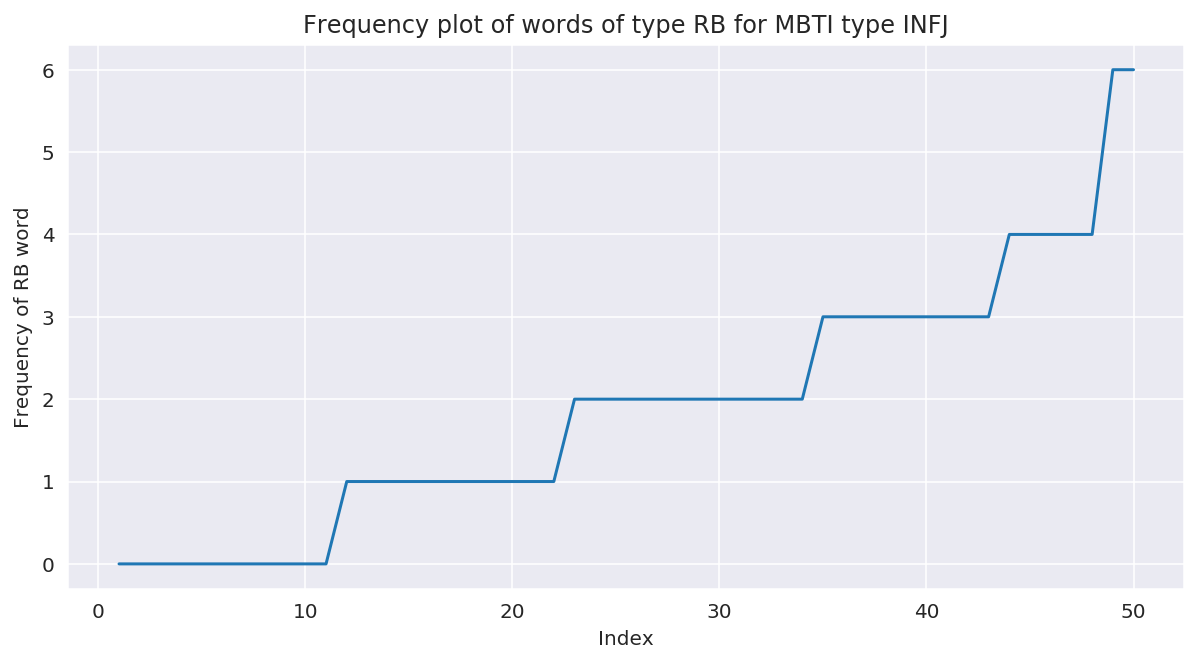

In [43]:
plot_wordtype(145, 'RB')

In addition to simply counting all that occurs, I think it would be good to kinda 'summarize' them

Like for example the nouns come in many forms, like NN, NNP, NNS, NNPS - but we can group all together, for instance.

Such distinction is useful for word generation I guess but not that useful for purpose of my use.

Lets see... Now I shall do the following:

Tag	| Meaning	|English Examples
----|-----------|------------------
ADJ	|adjective	|new, good, high, special, big, local
ADP	|adposition	|on, of, at, with, by, into, under
ADV	|adverb	|really, already, still, early, now
CONJ |conjunction	|and, or, but, if, while, although
DET	|determiner, article	|the, a, some, most, every, no, which
NOUN|	noun	|year, home, costs, time, Africa
NUM	|numeral	|twenty-four, fourth, 1991, 14:24
PRT	|particle	|at, on, out, over per, that, up, with
PRON|	pronoun	|he, their, her, its, my, I, us
VERB|	verb	|is, say, told, given, playing, would
.	|punctuation marks	|. , ; !
X	|other	|ersatz, esprit, dunno, gr8, univeristy

But I will still keep the original columns heh

In [44]:
#Create columns to get the mean and std for each POS tagging for each row
def pos_cat(x, wordie):
    return [len([y for y in line if y[1] == wordie])for line in x]
    

for col in columnname:
    mbti['POS_'+col+'_mean'] = mbti['tagged_words'].apply(lambda x: np.mean(pos_cat(x, col)))
    mbti['POS_'+col+'_std'] = mbti['tagged_words'].apply(lambda x: np.std(pos_cat(x, col)))
mbti.head()

type                                         words_only  \
0  INFJ  [, , enfp and intj moments sportscenter not to...   
1  ENTP  [I'm finding the lack of me in these posts ver...   
2  INTP  [Good one _____, Of course, to which I say I k...   
3  INTJ  [Dear INTP, I enjoyed our conversation the oth...   
4  ENTJ  [You're fired., That's another silly misconcep...   

                                               image  \
0  [http://41.media.tumblr.com/tumblr_lfouy03PMA1...   
1  [http://img188.imageshack.us/img188/6422/6020d...   
2                                                 []   
3                                                 []   
4  [https://encrypted-tbn2.gstatic.com/images?q=t...   

                                          video_link  \
0  [http://www.youtube.com/watch?v=qsXHcwe3krw, h...   
1       [http://www.youtube.com/watch?v=j5W73HaVQBg]   
2  [https://www.youtube.com/watch?v=fHiGbolFFGw, ...   
3  [https://www.youtube.com/watch?v=uelHwf8o7_U, ...   
4  [https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...   

                                           otherlink  n_video  n_links  \
0                                                 []       17       24   
1                                                 []        1       10   
2  [https://www.tumblr.com/blog/-alexxxandra-, ht...        3        5   
3                                                 []        2        2   
4                                                 []        3        6   

   n_image  n_otherlink                                        video_title  \
0        7            0  [FLYING IN MY PJs - [Living In Alaska 256], EN...   
1        9            0  [Jermaine Dupri - Welcome To Atlanta ft. Ludac...   
2        0            2  [Radiohead - Paranoid Android, ÐÐºÐµÐ°Ð½ ÐÐ»...   
3        0            0  [Eminem - Love The Way You Lie ft. Rihanna, Ro...   
4        3            0  [Yung Gud - Hello (Ft. Yemi), Verbatim: What I...   

   ... POS_``_mean  POS_``_std  POS_#_mean POS_#_std  POS_FW_mean POS_FW_std  \
0  ...         0.0         0.0         0.0       0.0          0.0        0.0   
1  ...         0.0         0.0         0.0       0.0          0.0        0.0   
2  ...         0.0         0.0         0.0       0.0          0.0        0.0   
3  ...         0.0         0.0         0.0       0.0          0.0        0.0   
4  ...         0.0         0.0         0.0       0.0          0.0        0.0   

   POS_WP$_mean POS_WP$_std  POS_LS_mean  POS_LS_std  
0           0.0         0.0          0.0         0.0  
1           0.0         0.0          0.0         0.0  
2           0.0         0.0          0.0         0.0  
3           0.0         0.0          0.0         0.0  
4           0.0         0.0          0.0         0.0  

[5 rows x 127 columns]

In [45]:
mbti.to_pickle('../after_pos_stats')

In [46]:
#For reference ;)
lollie = """
CC Coordinating conjunction *
CD Cardinal number *
DT Determiner *
EX Existential there *
FW Foreign word *
IN Preposition or subordinating conjunction *
JJ Adjective *
JJR Adjective, comparative *
JJS Adjective, superlative *
LS List item marker *
MD Modal *
NN Noun, singular or mass *
NNS Noun, plural *
NNP Proper noun, singular *
NNPS Proper noun, plural *
PDT Predeterminer *
POS Possessive ending ?
PRP Personal pronoun *
PRP$ Possessive pronoun *
RB Adverb *
RBR Adverb, comparative *
RBS Adverb, superlative *
RP Particle *
SYM Symbol ?
TO to *
UH Interjection *
VB Verb, base form *
VBD Verb, past tense
VBG Verb, gerund or present participle *
VBN Verb, past participle *
VBP Verb, non­3rd person singular present *
VBZ Verb, 3rd person singular present *
WDT Wh­determiner *
WP Wh­pronoun *
WP$ Possessive wh­pronoun *
WRB Wh­adverb *
"""

#Lets make a dictionary
convtag_dict={'ADJ':['JJ','JJR','JJS'], 'ADP':['EX','TO'], 'ADV':['RB','RBR','RBS','WRB'], 'CONJ':['CC','IN'],'DET':['DT','PDT','WDT'],
              'NOUN':['NN','NNS','NNP','NNPS'], 'NUM':['CD'],'PRT':['RP'],'PRON':['PRP','PRP$','WP','WP$'],
              'VERB':['MD','VB','VBD','VBG','VBN','VBP','VBZ'],'.':['#','$',"''",'(',')',',','.',':'],'X':['FW','LS','UH']}

In [47]:
def bigcol_tag(x, col):
    newlist = [len([y for y in line if y[1] in convtag_dict[col]])for line in x]       
    return newlist

for col in convtag_dict.keys():  
    mbti['BIGPOS_'+col+'_med'] = mbti['tagged_words'].apply(lambda x: np.median(bigcol_tag(x, col)))
    mbti['BIGPOS_'+col+'_std']= mbti['tagged_words'].apply(lambda x: np.std(bigcol_tag(x, col)))

In [52]:
# mbti['n_mbti_self'] = mbti.apply(lambda x: 1 if x['type']==x['mbti_ref_most'] else 0, axis=1)

Pickle

In [48]:
mbti.to_pickle('mbti_ver2.pickle')

# \**Checkpoint \**

In [2]:
mbti = pd.read_pickle('mbti_ver2.pickle')

In [49]:
#Take out irrelevant columns
mbti_w = mbti[['words_only','image','video_title','otherlink','emoticons','ennea','tagged_words']]
mbti_n = mbti.drop(['type','image','video_link','video_title',
                    'otherlink','emoticons','hashtag','mbti_ref','mbti_ref_most','ennea','tagged_words',
                   'tagged_words', 'is_E','is_S','is_T','is_J'], axis=1)

In [50]:
mbti_n['words_only'] = mbti_n['words_only'].apply(lambda x: ' '.join(x))

# Term Frequency - Inverse Document Frequency

From here on I will start to split the dataset by the following:

1. Duplicate the set by 4, with 4 types of ys using is_E, is_S, is_T and is_J
2. Fit the model once with the full set
3. Do a stratified split for all 4 sets, so I will have 4 sets of X_train and 4 sets of X_test
4. Transform all of them
5. Using a chi-squared test, try to scale down the dimension separately

So from here on actually we might start to see how each feature may be more effective in one model than another. From here on each model may start to 'deviate' from one another



In [51]:
#We love sklearn <3 <3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
import nltk
from nltk.tokenize import word_tokenize

In [52]:
mbti_n['word_char_ratio'] = mbti_n['word_char_ratio'].fillna(np.median(mbti_n[~mbti_n['word_char_ratio'].isnull()]['word_char_ratio']))

In [56]:
y_E = mbti['is_E']
y_S = mbti['is_S']
y_T = mbti['is_T']
y_J = mbti['is_J']
X = mbti_n

class Thipe(object):
    
    def __init__(self, X, y, stan=True, rand=42, web=True, include_feature='all'):
        self.stan=stan
        self.web=web
        self.include_feature=include_feature
        self.X=X
        self.y=y
        self.random_state = rand
        self.columns=None
        self.X_train=None
        self.y_train=None
        self.columnie=[]
        self.columners=[]
        #I will be porting some features to other classes sooooo...
        self.tfidf_list=[]
        self.tsvd_list=[]
        self.ss=None
        self.mms=None
        self.ch2=None
        self.sexy=None
        
    def baseline_acc(self):
        baseline = max(self.y.value_counts()[0], self.y.value_counts()[1]) / float(self.y.value_counts().sum())
        return baseline * 100,'\%'
        
        
    def trainy(self, testy=0.2, imbl=True):
        """
        I'll do the following here:
        1. Do train test split
        2. Convert X_train and X_test to DataFrame (to delete column later plus other purposes)
        3. Do tfidf using train section, use the model and fit the X_train and X_test (then can delete the wordchunk column)
        4. If StandardScaler, scale the training and test data. (Default = True)
        5. To prepare data for chi2 reduction we need to scale everything to above 0, so MinMaxScaler
        """
               
        #This is perhaps the main reason why this step is embedded in a class
        #Because the stratification would be different, everything would be different already, like the tfidf vocab for example
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, random_state=self.random_state,
                                                                      test_size=testy, stratify=self.y)
            
        self.y_train=y_train
        self.y_test=y_test     
        X_train = pd.DataFrame(X_train, columns=self.columns)
        X_test = pd.DataFrame(X_test, columns=self.columns)
        df_train = pd.DataFrame()
        df_test = pd.DataFrame()
        
        for i in np.arange(1,4):
            tfidf = TfidfVectorizer(stop_words='english',ngram_range=(i,i), decode_error='replace', max_features=10000)
            Xword_train = tfidf.fit_transform(X_train['words_only'])
            Xword_test = tfidf.transform(X_test['words_only'])

            #We need to reduce the size of the tfidf trained matrix first
            #But after running TruncatedSVD we cannot see the words specifically alr so too bad...
            tsvd = TruncatedSVD(n_components=500, algorithm='arpack', random_state=self.random_state)
            Xwordie_train = tsvd.fit_transform(Xword_train)
            Xwordie_test = tsvd.transform(Xword_test)
            Xwordie_train_df = pd.DataFrame(Xwordie_train,
                                            columns=[str(i)+'_'+str(b) for b in np.arange(1,Xwordie_train.shape[1]+1)])
            Xwordie_test_df = pd.DataFrame(Xwordie_test,
                                           columns=[str(i)+'_'+str(b) for b in np.arange(1,Xwordie_test.shape[1]+1)])
            df_train = pd.concat([df_train,Xwordie_train_df], axis=1)
            df_test = pd.concat([df_test,Xwordie_test_df], axis=1)
            self.tfidf_list.append(tfidf)
            self.tsvd_list.append(tsvd)        
        
        X_train.drop(['words_only'],axis=1,inplace=True)
        X_test.drop(['words_only'],axis=1,inplace=True)
        X = self.X.drop(['words_only'], axis=1)
        if self.web:
            X_train.drop(['n_video','n_links','n_image','n_otherlink','mention_count','hashtag_count','mbti_ref_count','ennea_count',
                          'bracket_count'], axis=1, inplace=True)
            X_test.drop(['n_video','n_links','n_image','n_otherlink','mention_count','hashtag_count','mbti_ref_count','ennea_count',
                          'bracket_count'], axis=1, inplace=True)
            X.drop(['n_video','n_links','n_image','n_otherlink','mention_count','hashtag_count','mbti_ref_count','ennea_count',
                          'bracket_count'], axis=1, inplace=True)
        self.columns = X_train.columns
        
        #Standardization step
        if self.stan:
            ss = StandardScaler().fit(X)
            X_train = ss.transform(X_train)
            X_test = ss.transform(X_test)
            X_train = pd.DataFrame(X_train, columns=self.columns)
            X_test = pd.DataFrame(X_test, columns=self.columns)
            self.ss = ss
            
        #Join step
        if self.include_feature == 'words':
            X_train = df_train
            X_test = df_test
            self.columnie = X_train.columns
        else:
            X_train = X_train.join(df_train)
            X_test = X_test.join(df_test)
            self.columnie = X_train.columns
            
        
        #Scale again to between 0 and 1
        combined_X = pd.concat([X_train,X_test],axis=0)
        mms = MinMaxScaler().fit(combined_X)
        X_train = pd.DataFrame(mms.transform(X_train), columns=self.columnie)
        X_test = pd.DataFrame(mms.transform(X_test), columns=self.columnie)
               
        if imbl:
            imbler = RandomUnderSampler(random_state=42)
            X_train, y_train = imbler.fit_sample(X_train, y_train)
        
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.mms = mms
        
        return X_train, X_test, y_train, y_test
    
    def reducy(self, n_features=100):
        """
        Use chi2 to shrink down features
        """
        ch2 = SelectKBest(chi2, k=n_features)
        X_train = ch2.fit_transform(self.X_train, self.y_train)
        X_test = ch2.transform(self.X_test)
        self.columners = self.columnie[ch2.get_support()]
        self.ch2=ch2
        self.X_train=X_train
        self.X_test=X_test
        return X_train, X_test

        
    def try_model(self, model, label):
        sexy = model.fit(self.X_train, self.y_train)
        print("Score:", sexy.score(self.X_test, self.y_test))
        print("Cross val score:", cross_val_score(model, self.X_train, self.y_train, cv=5, scoring='f1'))
        yhat = sexy.predict(X_test)
        self.sexy = sexy
        print(classification_report(self.y_test, yhat, target_names=label))
        print(pd.DataFrame(confusion_matrix(self.y_test, yhat), index=[label[0]+'_true', label[1]+'_true'],
                          columns=[label[0]+'_pred',label[1]+'__pred']))
        
    def niceplot(self):
        pass
    

In [57]:
E = Thipe(X, y_E, rand=45)

In [58]:
X_train, X_test, y_train, y_test = E.trainy()
X_train, X_test = E.reducy()
E.try_model(model=LogisticRegression(penalty='l1'), label=['Introvert','Extrovert'])

/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.8219020172910663


/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

Cross val score: [0.81540931 0.80325203 0.81803543 0.80573248 0.82182986]
              precision    recall  f1-score   support

   Introvert       0.92      0.84      0.88      1335
   Extrovert       0.59      0.77      0.67       400

    accuracy                           0.82      1735
   macro avg       0.76      0.80      0.77      1735
weighted avg       0.85      0.82      0.83      1735

                Introvert_pred  Extrovert__pred
Introvert_true            1118              217
Extrovert_true              92              308


In [59]:
good_df = pd.DataFrame()
good_df['Features'] = E.columners
good_df['Scores'] = E.ch2.scores_[E.ch2.get_support()]
good_df['p-value'] = E.ch2.pvalues_[E.ch2.get_support()]
good_df

Features    Scores   p-value
0   emoticon_count  0.678217  0.410201
1         n_action  1.628822  0.201866
2           n_caps  3.875362  0.049000
3      n_caps_char  4.601679  0.031941
4   word_cap_ratio  1.733496  0.187965
..             ...       ...       ...
95           2_401  0.239585  0.624506
96           2_406  0.275417  0.599721
97           2_449  0.248728  0.617972
98           2_457  0.416713  0.518582
99             3_5  0.259186  0.610680

[100 rows x 3 columns]

In [60]:
good_df.sort_values('p-value', ascending=True).head(10)

Features    Scores   p-value
36            1_15  6.121288  0.013356
32            1_11  5.663833  0.017318
3      n_caps_char  4.601679  0.031941
2           n_caps  3.875362  0.049000
29             1_7  3.864551  0.049316
37            1_16  3.524745  0.060459
27             1_3  3.395401  0.065378
30             1_9  3.115457  0.077553
31            1_10  2.745384  0.097536
5   char_cap_ratio  2.396787  0.121585

Text(0.5, 1.0, 'Distribution of feature 1_15')

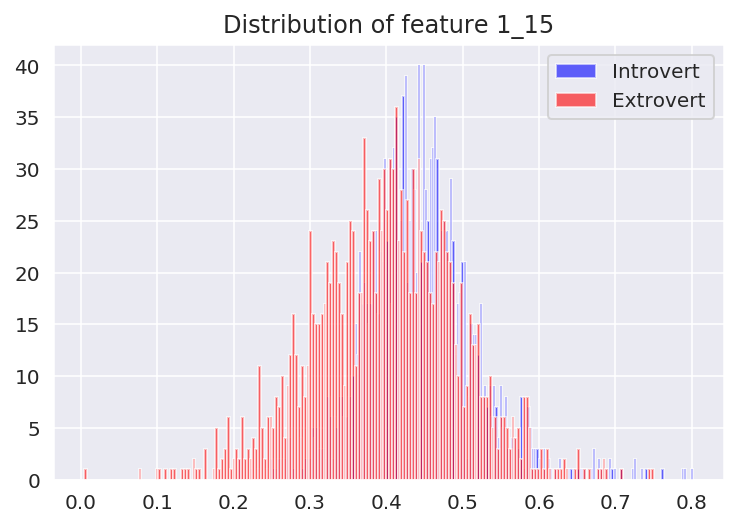

In [61]:
lalaland = pd.DataFrame()
lalaland['y'] = y_train
lalaland['x'] = X_train[:,37]
plt.hist(lalaland[lalaland['y']==0]['x'], bins=200, alpha=0.6, color='blue')
plt.hist(lalaland[lalaland['y']==1]['x'], bins=200, alpha=0.6, color='red')
plt.legend(['Introvert','Extrovert'])
plt.title("Distribution of feature 1_15")

We first look at how the model performs with logistic regression

This is a classification problem, so of course we cannot just look at the score alone

In [62]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2, scoring='f1')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_E_try.py')

Generation 1 - Current best internal CV score: 0.812851821731378
Generation 2 - Current best internal CV score: 0.812851821731378
Generation 3 - Current best internal CV score: 0.812851821731378
Generation 4 - Current best internal CV score: 0.812851821731378
Generation 5 - Current best internal CV score: 0.812851821731378
Generation 6 - Current best internal CV score: 0.812851821731378
Generation 7 - Current best internal CV score: 0.81295149963895
Generation 8 - Current best internal CV score: 0.81295149963895
Generation 9 - Current best internal CV score: 0.81295149963895
Generation 10 - Current best internal CV score: 0.81295149963895

Best pipeline: KNeighborsClassifier(ExtraTreesClassifier(LogisticRegression(input_matrix, C=10.0, dual=True, penalty=l2), bootstrap=True, criterion=entropy, max_features=0.8500000000000001, min_samples_leaf=4, min_samples_split=8, n_estimators=100), n_neighbors=76, p=2, weights=uniform)
0.6563786008230452


In [63]:
S = Thipe(X, y_S)
X_train, X_test, y_train, y_test = S.trainy()
X_train, X_test = S.reducy()
S.try_model(model=LogisticRegression(), label=['Intuitive','Sensing'])

/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.8086455331412103


/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross val score: [0.83076923 0.8032345  0.84375    0.81081081 0.83289125]
              precision    recall  f1-score   support

   Intuitive       0.96      0.81      0.88      1496
     Sensing       0.40      0.79      0.53       239

    accuracy                           0.81      1735
   macro avg       0.68      0.80      0.71      1735
weighted avg       0.88      0.81      0.83      1735

                Intuitive_pred  Sensing__pred
Intuitive_true            1214            282
Sensing_true                50            189


In [64]:
S.try_model(model=LogisticRegression(penalty='l1'), label=['Intuitive','Sensing'])

/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.8253602305475505


/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

Cross val score: [0.84020619 0.8150134  0.84514436 0.82162162 0.8616188 ]
              precision    recall  f1-score   support

   Intuitive       0.96      0.83      0.89      1496
     Sensing       0.43      0.81      0.56       239

    accuracy                           0.83      1735
   macro avg       0.70      0.82      0.73      1735
weighted avg       0.89      0.83      0.85      1735

                Intuitive_pred  Sensing__pred
Intuitive_true            1239            257
Sensing_true                46            193


In [65]:
tpot.fit(S.X_train, S.y_train)
print(tpot.score(S.X_test, S.y_test))
tpot.export('tpot_S_try.py')

Generation 1 - Current best internal CV score: 0.8304318966552652
Generation 2 - Current best internal CV score: 0.8304318966552652
Generation 3 - Current best internal CV score: 0.8322797127685254
Generation 4 - Current best internal CV score: 0.8322797127685254
Generation 5 - Current best internal CV score: 0.8322797127685254
Generation 6 - Current best internal CV score: 0.8366067104179844
Generation 7 - Current best internal CV score: 0.8368966730784809
Generation 8 - Current best internal CV score: 0.8392212613445155
Generation 9 - Current best internal CV score: 0.8392212613445155
Generation 10 - Current best internal CV score: 0.8392212613445155

Best pipeline: ExtraTreesClassifier(LinearSVC(RFE(input_matrix, criterion=gini, max_features=0.9500000000000001, n_estimators=100, step=0.4), C=5.0, dual=False, loss=squared_hinge, penalty=l1, tol=0.0001), bootstrap=False, criterion=gini, max_features=0.5, min_samples_leaf=12, min_samples_split=10, n_estimators=100)
0.560117302052786


In [66]:
T = Thipe(X, y_T)
X_train, X_test, y_train, y_test = T.trainy(imbl=False)
X_train, X_test = T.reducy()
T.try_model(model=LogisticRegression(), label=['Feeling','Thinking'])

/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.8322766570605188


/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross val score: [0.8218126  0.86410055 0.83881064 0.82895784 0.83216237]
              precision    recall  f1-score   support

     Feeling       0.85      0.84      0.84       939
    Thinking       0.81      0.83      0.82       796

    accuracy                           0.83      1735
   macro avg       0.83      0.83      0.83      1735
weighted avg       0.83      0.83      0.83      1735

               Feeling_pred  Thinking__pred
Feeling_true            786             153
Thinking_true           138             658


/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
T.try_model(model=LogisticRegression(penalty='l1'), label=['Feeling','Thinking'])

/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.8414985590778098


/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

Cross val score: [0.82605364 0.871875   0.84333593 0.83676704 0.8390625 ]
              precision    recall  f1-score   support

     Feeling       0.85      0.85      0.85       939
    Thinking       0.83      0.83      0.83       796

    accuracy                           0.84      1735
   macro avg       0.84      0.84      0.84      1735
weighted avg       0.84      0.84      0.84      1735

               Feeling_pred  Thinking__pred
Feeling_true            802             137
Thinking_true           138             658


In [68]:
tpot.fit(T.X_train, T.y_train)
print(tpot.score(T.X_test, T.y_test))
tpot.export('tpot_T_try.py')

Generation 1 - Current best internal CV score: 0.8440002029686333
Generation 2 - Current best internal CV score: 0.8440002029686333
Generation 3 - Current best internal CV score: 0.8440002029686333
Generation 4 - Current best internal CV score: 0.8446241977557453
Generation 5 - Current best internal CV score: 0.8446241977557453
Generation 6 - Current best internal CV score: 0.8447151707661835
Generation 7 - Current best internal CV score: 0.8447151707661835
Generation 8 - Current best internal CV score: 0.844716288674776
Generation 9 - Current best internal CV score: 0.8447361080936222
Generation 10 - Current best internal CV score: 0.8447361080936222

Best pipeline: LogisticRegression(SelectFwe(input_matrix, alpha=0.031), C=10.0, dual=True, penalty=l2)
0.8208673790069138


In [69]:
J = Thipe(X, y_J)
X_train, X_test, y_train, y_test = J.trainy(imbl=True)
X_train, X_test = J.reducy()
J.try_model(model=LogisticRegression(), label=['Perceiving','Judging'])

/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.7942363112391931


/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross val score: [0.78173516 0.79276018 0.78427788 0.78703704 0.79320113]
              precision    recall  f1-score   support

  Perceiving       0.84      0.81      0.83      1048
     Judging       0.73      0.77      0.75       687

    accuracy                           0.79      1735
   macro avg       0.78      0.79      0.79      1735
weighted avg       0.80      0.79      0.80      1735

                 Perceiving_pred  Judging__pred
Perceiving_true              852            196
Judging_true                 161            526


In [70]:
J.try_model(model=LogisticRegression(penalty='l1'), label=['Perceiving','Judging'])

/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.7936599423631124


/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

Cross val score: [0.78474114 0.79676259 0.79560037 0.79480037 0.79659413]
              precision    recall  f1-score   support

  Perceiving       0.84      0.81      0.83      1048
     Judging       0.73      0.77      0.75       687

    accuracy                           0.79      1735
   macro avg       0.78      0.79      0.79      1735
weighted avg       0.80      0.79      0.79      1735

                 Perceiving_pred  Judging__pred
Perceiving_true              849            199
Judging_true                 159            528


In [71]:
tpot.fit(J.X_train, J.y_train)
print(tpot.score(J.X_test, J.y_test))
tpot.export('tpot_J_try.py')

Generation 1 - Current best internal CV score: 0.7849752285215443
Generation 2 - Current best internal CV score: 0.7849752285215443
Generation 3 - Current best internal CV score: 0.7872471545656156
Generation 4 - Current best internal CV score: 0.7872471545656156
Generation 5 - Current best internal CV score: 0.7872471545656156
Generation 6 - Current best internal CV score: 0.7904742295254018
Generation 7 - Current best internal CV score: 0.7912088901613512
Generation 8 - Current best internal CV score: 0.7913000048683749
Generation 9 - Current best internal CV score: 0.7913000048683749
Generation 10 - Current best internal CV score: 0.7913489013839294

Best pipeline: LinearSVC(input_matrix, C=0.1, dual=False, loss=squared_hinge, penalty=l1, tol=0.0001)
0.7514204545454545


In [72]:
import pickle
# this takes a long time!
fileObject = open('../E.p','wb') 
pickle.dump(E,fileObject)
fileObject.close()
fileObject = open('../S.p','wb') 
pickle.dump(S,fileObject)
fileObject.close()
fileObject = open('../T.p','wb') 
pickle.dump(T,fileObject)
fileObject.close()
fileObject = open('../J.p','wb') 
pickle.dump(J,fileObject)
fileObject.close()

Verdict: Sometimes a simple Logistic Regression can do the trick. While using TPOT is convenient for finding out the best possible model to use, it may also run the risk of 'over-processing' and therefore overfitting. As seen from comparison with CV score and test score, the performance is not as great as we think...

## Now comes the half exciting part: Processing brand new data!

After training this data, of course what we really want to do with it is to use the trained model to predict fresh new input.
The class Thipe was used to train the model according to the 4 types, now we should have 4 instances to use.

For each instance, we have:
- 3 x tfidf plus 3 x tsvd
- StandardScaler
- MinMaxScaler
- SelectKBest(Using Chi2)
- Logistic Regression (or whichever model you like)

Process and process, until like from pig until Premium Sausage and Bacon flavoured cup noodles with Tonkotsu broth

In [76]:
class NewBerd(object):
    
    def __init__(self):
        self.wordlist=[]
        self.sumdict = {'n_links':0,'n_image':0,'n_video':0,'emoticon_count':0,'mention_count':0,
                        'hashtag_count':0,'mbti_ref_count':0,'ennea_count':0,'bracket_count':0,'dots_count':0,'n_char':0,
                       'n_word':0,'n_action':0,'n_caps':0,'n_caps_char':0}
        self.avgdict={}
        self.taggedcollections=[]
        self.n_posts=0
        self.dff = pd.DataFrame()
        self.columns = []
        self.test=None
    
    #Oh look what I just borrowed!
    
    def extractions_mod(self,line, string):
        """
        Input:
        x = A string of words
        string = regular expression that will match each word

        Output:
        lis = List of weblinks
        lis2 = List of 'words only' posts

        Taken from the preprocessing stage of the training set, except that now I am applying it to the user stage heheh.
        Instead of a list of sentences, we only have one string of words to deal with (each time).
        """
        lis=[]
        lin = line.split()
        sstring = re.compile(string, flags=re.M)
        lis_temp =[]
        for l in lin:
            if sstring.search(l):
                lis.append(sstring.search(l).group(0))
            else:
                lis_temp.append(l)
        lis_string = ' '.join(lis_temp)
        return lis, lis_string
    
    def onelvl_extract(self, x, string):
        """
        Input:
        x = A list of words
        string = regular expression in string form

        How the function works:

        Iterating through each word, if the word matches the regular expression, it will be added into the new list.
        The new list will hence be collecting all the re matched words that came from the input list with the chunk of sentences.
        This function returns the new list.
        """

        lis=[]
        sstring = re.compile(string, flags=re.M)
        for line in x.split():
            if sstring.search(line):
                lis.append(sstring.search(line).group(0))
        return lis
    
    def aggregate(self, words_only, tot_thing, string=''):
        tot_thing = tot_thing + len(self.onelvl_extract(words_only, string=string))
        n_thing = tot_thing * (50./len(self.wordlist))
        return tot_thing, n_thing
    
    def aggregate_web(self, weblink, tot_thing, string='.*'):
        tot_thing = tot_thing + len([y for y in weblink if re.match(string, y)])
        n_thing = tot_thing * (50./len(self.wordlist))
                                    #Special formula to match aggregate number with number of posts in training set
        return tot_thing, n_thing
        
    #Actual function 1
    def preprocess(self, input_string, web=True):
        self.wordlist.append(input_string)
        weblink, words_only = self.extractions_mod(line=input_string, string='https?://.*') #Weblink in list form, words_only in string form
        #Confirm again if we want to use web data
        if web:
            self.sumdict['n_links'], self.avgdict['n_links'] = self.aggregate_web(weblink, self.sumdict['n_links'])
            self.sumdict['n_image'], self.avgdict['n_image'] = self.aggregate_web(weblink, self.sumdict['n_image'],
                                                                   string='.*\.(jpg|png|jpeg|gif).*|.*img.*|.*image.*')
            self.sumdict['n_video'], self.avgdict['n_video'] = self.aggregate_web(weblink, self.sumdict['n_video'],
                                                                   string='https?://.*youtu.*|http.*vimeo.*')
            self.sumdict['n_otherlink'] = self.sumdict['n_links']-self.sumdict['n_image']-self.sumdict['n_video']
            self.avgdict['n_otherlink'] = self.sumdict['n_otherlink'] * (50./len(self.wordlist))
            self.sumdict['mention_count'], self.avgdict['mention_count'] = self.aggregate(words_only,
                                                                           tot_thing=self.sumdict['mention_count'], string='@\w*')
            self.sumdict['hashtag_count'], self.avgdict['hashtag_count'] = self.aggregate(words_only,
                                                                           tot_thing=self.sumdict['hashtag_count'],
                                                                           string='#\w[\w\d]*')
            self.sumdict['mbti_ref_count'], self.avgdict['mbti_ref_count'] = self.aggregate(words_only,
                                                                             tot_thing=self.sumdict['mbti_ref_count'],
                                                                             string='[eiEI][snSN][tfTF][jpJP]')
            self.sumdict['ennea_count'], self.avgdict['ennea_count'] = self.aggregate(words_only,
                                                                       tot_thing=self.sumdict['ennea_count'], string='\dw\d')
            self.sumdict['bracket_count'], self.avgdict['bracket_count'] = self.aggregate(words_only,
                                                                           tot_thing=self.sumdict['bracket_count'],
                                                                           string='\[.*?\]')
        else:
            #Get rid of the dictionary keys not used
            map(lambda x: self.sumdict.pop(x, None), ['n_video','n_links','n_image','mention_count','hashtag_count',
                                                      'mbti_ref_count','ennea_count','bracket_count'])
            
        
        self.sumdict['emoticon_count'], self.avgdict['emoticon_count'] = self.aggregate(words_only,
                                                                         tot_thing=self.sumdict['emoticon_count'], string=':\w*:')
        self.sumdict['dots_count'], self.avgdict['dots_count'] = self.aggregate(words_only,
                                                                tot_thing=self.sumdict['dots_count'], string='\.\.\.')
        self.sumdict['n_action'], self.avgdict['n_action'] = self.aggregate(words_only,
                                                             tot_thing=self.sumdict['n_action'], string='\*\w.*\*')
        #This one abit special
        capp = self.onelvl_extract(words_only, string=r'(?!([eiEI]?[snSN][tfTF][jpJP]|MBTI))[A-Z]{3,}')
        self.sumdict['n_caps'] += len(capp)
        self.avgdict['n_caps'] = self.sumdict['n_caps'] * (50./len(self.wordlist))
        self.sumdict['n_caps_char'] += np.sum([len(y) for y in capp])
        self.avgdict['n_caps_char'] = self.sumdict['n_caps_char'] * (50./len(self.wordlist))
        self.sumdict['n_char'] += len(words_only)
        self.avgdict['n_char'] = self.sumdict['n_char'] * (50./len(self.wordlist))
        self.sumdict['n_word'] += len(words_only.split())
        self.avgdict['n_word'] = self.sumdict['n_word'] * (50./len(self.wordlist))
        #No need sumdict
        self.avgdict['word_cap_ratio'] = float(self.sumdict['n_caps']) / self.sumdict['n_word']
        self.avgdict['char_cap_ratio'] = float(self.sumdict['n_caps_char']) / self.sumdict['n_char']
        self.avgdict['med_char'] = np.median([len(y) for y in self.wordlist])
        self.avgdict['med_word'] = np.median([len(y.split()) for y in self.wordlist])
        self.avgdict['word_char_ratio'] = self.avgdict['med_char'] / self.avgdict['med_word']
        
        #Save to dataframe
        self.dff = pd.DataFrame(self.avgdict, index=[1])
        
        #Create list and dictionary of POS tagging based on existing labels extracted from before
        convtag_dict={'ADJ':['JJ','JJR','JJS'], 'ADP':['EX','TO'], 'ADV':['RB','RBR','RBS','WRB'], 'CONJ':['CC','IN'],'DET':['DT','PDT','WDT'],
              'NOUN':['NN','NNS','NNP','NNPS'], 'NUM':['CD'],'PRT':['RP'],'PRON':['PRP','PRP$','WP','WP$'],
              'VERB':['MD','VB','VBD','VBG','VBN','VBP','VBZ'],'.':['#','$',"''",'(',')',',','.',':'],'X':['FW','LS','UH']}
        tagg = nltk.pos_tag(word_tokenize(input_string))
        self.taggedcollections.append(tagg)
        lollie = ['#','$',"''",'``','(',')',',','.',':','CC','CD','DT','EX','FW','IN','JJ','JJR','JJS','LS','MD','NN','NNS','NNP','NNPS','PDT','POS','PRP','PRP$','RB',
                  'RBR','RBS','RP','SYM','TO','UH','VB','VBD','VBG','VBN','VBP','VBZ','WDT','WP','WP$','WRB']

        #Create columns to get the mean and std for each POS tagging for each row
        for col in lollie:
            self.dff['POS_'+col+'_mean'] = [np.mean([len([y for y in line if y[1] == col])for line in self.taggedcollections])]
            self.dff['POS_'+col+'_std'] = [np.std([len([y for y in line if y[1] == col])for line in self.taggedcollections])]
        for col in convtag_dict.keys():  
            self.dff['BIGPOS_'+col+'_med'] = [np.median([len([y for y in line if y[1] in convtag_dict[col]])
                                                   for line in self.taggedcollections])]
            self.dff['BIGPOS_'+col+'_std']= [np.std([len([y for y in line if y[1] in convtag_dict[col]])
                                                   for line in self.taggedcollections])]

    def perform_magic(self, M):
        """
        This function takes in the instance for each typology class and comes out with the prediction
        Basically the most important function!
        """
        ok_df = pd.DataFrame()
        chunkie = [' '.join(self.wordlist)]
        for i,(tfidf, tsvd) in enumerate(zip(M.tfidf_list, M.tsvd_list)):
            wowwie = tsvd.transform(tfidf.transform(chunkie))
            da_df = pd.DataFrame(wowwie, columns=[str(i+1)+'_'+str(b) for b in np.arange(1,wowwie.shape[1]+1)])
            ok_df = pd.concat([ok_df,da_df], axis=1)
        
        #Set columns
        self.dff = self.dff[M.columns]
        column1 = self.dff.columns
        stded = M.ss.transform(self.dff)
        combinedf = pd.DataFrame(stded, columns=column1).join(ok_df)
        column2 = combinedf.columns
        combinedf = pd.DataFrame(M.mms.transform(combinedf), columns=column2)
        self.test = M.ch2.transform(combinedf)
        magic = M.sexy.predict(self.test)
        return magic
    
    def perform_more_magic(self, M):
        return M.sexy.predict_proba(self.test)[0][M.sexy.predict(self.test)]
    

Example input

In [77]:
Yixuan = NewBerd()

In [78]:
entry = 'I dunno lah see how lor...'
Yixuan.preprocess(entry, web=False)

In [79]:
entry = 'Hey hey you you I know that you like me' #Just change this portion and run from here every time
Yixuan.preprocess(entry, web=False)

In [80]:
def more_magic(dude):
    typerogy = lambda x, y: y[1] if x[0]==[1] else y[0]
    mpred = []
    mpred_prob = []
    mpred.append(typerogy(dude.perform_magic(E), ['Introvert','Extrovert']))
    mpred.append(typerogy(dude.perform_magic(S), ['iNtuitive','Sensing']))
    mpred.append(typerogy(dude.perform_magic(T), ['Feeling','Thinking']))
    mpred.append(typerogy(dude.perform_magic(J), ['Perceiving','Judging']))
    for m in [E, S, T, J]:
        mpred_prob.append(dude.perform_more_magic(m))
    tadaa = pd.DataFrame()
    tadaa['Type'] = mpred
    tadaa['Probability'] = mpred_prob
    return tadaa

In [81]:
more_magic(Yixuan)

Type           Probability
0   Extrovert  [0.9990946174609697]
1     Sensing  [0.8806153010326654]
2     Feeling   [0.849451492223752]
3  Perceiving  [0.7771872633617201]

In [82]:
Yixuan.wordlist

['I dunno lah see how lor...', 'Hey hey you you I know that you like me']

In [83]:
E.sexy.predict_proba(Yixuan.test)[0][0]

0.9990946174609697

Tentative test case: Read from own dataset

In [84]:
#Choose your index from 0 to 8674
select = 8
Someguy = NewBerd()

In [86]:
mbti_test = pd.read_csv('mbti_1.csv')
mbti_textlist = mbti_test.iloc[select,1].split('|||')
#print mbti_textlist
for line in mbti_textlist:
    Someguy.preprocess(line, web=False)

In [1]:
print(mbti_test.iloc[select,0])
%time print(more_magic(Someguy))

NameError: name 'mbti_test' is not defined

The next exciting part will be myself building a webapp or even a telegram bot or something. Stay tuned!